<a href="https://colab.research.google.com/github/serinss/seSAC_ML_DL_Class/blob/main/%EB%B6%84%EB%A5%98%EC%97%90_%EA%B4%80%ED%95%9C_%EC%84%B1%EB%8A%A5%EC%A7%80%ED%91%9C_%EC%B6%94%EA%B0%80_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%run my_init.py

Mounted at /content/drive
tf.__version__: 2.8.0
keras.__version__: 2.8.0


In [2]:
%matplotlib inline

In [ ]:
# titanic_train.csv 세션에 첨부

In [6]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit( ) 메소드는 아무것도 학습하지 않음. 멍텅구리
    def fit(self, X , y=None):
        pass
    
    # predict( ) 메소드는 단순히 Sex feature가 1 이면 0 , 그렇지 않으면 1 로 예측함. 
    # 생존 여부
    def predict(self, X):
        pred = np.zeros( ( X.shape[0], 1 ))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        
        return pred

In [7]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True) # inplace -> dataFrame 사용 시, 복사본이 아닌 원본 변경
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. -> one-hot encoding과 같음
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [8]:
# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=0)

In [10]:
myclf = MyDummyClassifier()
myclf.fit(X_train ,y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test , mypredictions)))
# 학습과정 fit을 pass했는데 78%

Dummy Classifier의 정확도는: 0.7877


In [12]:
from sklearn.datasets import load_digits
class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self,X):
        return np.zeros( (len(X), 1) , dtype=bool) #완전 페이크 

# 사이킷런의 내장 데이터 셋인 load_digits( )를 이용하여 MNIST 데이터 로딩
digits = load_digits()

print(digits.data)
print("### digits.data.shape:", digits.data.shape) # 8*8 이미지 데이터
print(digits.target)
print("### digits.target.shape:", digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)


In [13]:
digits.target == 7

array([False, False, False, ..., False, False, False])

In [15]:
y =(digits.target == 7).astype(int) #타겟의 정보가 7이면 int값 1을 저장, false면 0

In [16]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [17]:
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train , y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test , fakepred)))

# 완전 페이크 90% !!

모든 예측을 0으로 하여도 정확도는:0.900


In [18]:
# 어떻게 위와 같은 정확도가 나왔나?

from sklearn.metrics import confusion_matrix #혼동행렬(= 오차행렬)

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

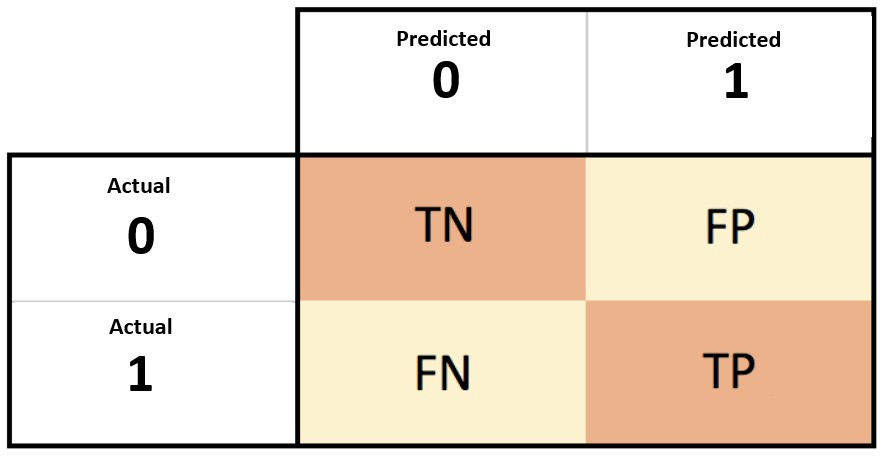

(1,1) : True Negative  
(2,2) : True Positive  
-> 맞춘 경우  
(1,2) : False Positive(가짜양성)  
(2,1) : False Negative(가짜음성)  
-> 틀린 경우  
(위양성, 위음성) 으로 쓸 수도 있음  
이걸 알고 있으면 분류모델에 관한 것들을 알 수 있음 -> 정확도 계산  
accuracy = 맞춘 확률(TN+TP)/전체 확률(TN+FP+FN+TP)  

- 재현율,recall vs 정밀도,precision  
recall = TP/FP+TP = 예측이 1인 것 중에서 맞춘 확률   
precision = TP/FN+TP = 실제 1인 것 중에서 맞춘 확률  
  - 둘은 서로 시소관계임


ex. 암 환자의 발병확률을 예측한다고 하자. 어떤 것이 중요한가?  
정밀도만이 중요한 것은 아님  오진으로 인해 수술받지 않아도 되는데, 수술을 받아버릴 수 있음  
-> 재현율과 정밀도는 case by case  

ex. NAVER 한글 창제 년도 관련 문서 찾아줌 = 재현율에 focusing  

조화평균 F1 socroe = 1/(1/recall)+(1/precision)  
= 2 * (recall * precision)/(recall + precision)  
-> 절충해서 사용할 때, 조화평균 지표 사용

#ROC Curve
Reciever Operational Characteristic : 수신자 작동 특성  
머신러닝 이진분류에서 사용  


##TPR(True Positive Rate) = Sensitivity 민감도
-> 전체에서 찐짜 양성을 예측하는 정도 -> 재현율 관련  
TP/FN+TP
##FPR(False Positive Rate)
1-TNR
##TNR(특이성, specificity)
TN/TN+FP

Random Classifier 랜덤 분류기보다 못하면.. 반대로 움푹 파여 있으면 반성해야

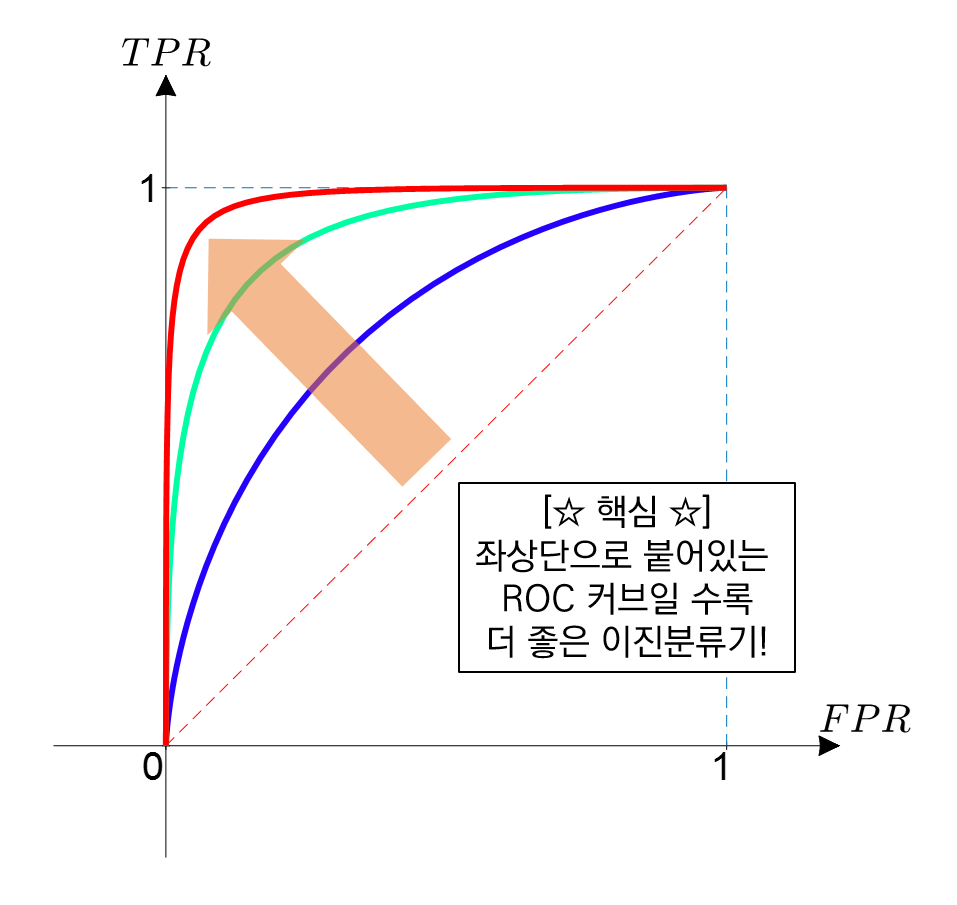

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error